<a href="https://colab.research.google.com/github/Shreyash-2001/HOTEL_BBOKING_ANALYSIS_CAPSTONE_1/blob/main/Hotel_Booking_Analysis_Shreyash_Pattnayak_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **IMPORTING NUMPY, PANDAS MAYPLOTLIB & SEABORN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns          #Import numpy, pandas, matplot.lib & seaborn

Loading the .CSV file from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  #Mounting Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel_booking_df = pd.read_csv("/content/drive/MyDrive/Collab Notebooks/Capstone Project 1/Hotel Bookings.csv")
                               #Uploading csv file

In [ ]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking_df.info()  #Information of dataframes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_booking_df.shape   #shape of dataframe

(119390, 32)

In [ ]:
hotel_booking_df.isnull().sum()   #sorting null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**MAKING COPY OF ORIGINAL DATAFRAMES SO THAT WE WORK ON THE COPY DATA FRAME AND THE ORIGINAL DATA FRAME DOES NOT GET AFFECTED**

In [ ]:
hotel_booking_new = hotel_booking_df.copy()   #making a different copy of the original for changes to come

In [ ]:
hotel_booking_new['children']=hotel_booking_new['children'].fillna(0).astype(int)
                #Replacing NaN value for children Coloumn

In [ ]:
hotel_booking_new['Kids']=(hotel_booking_new['children']+hotel_booking_new['babies']).astype(int)

In [ ]:
hotel_booking_new.isnull().sum()  #finding the total NaN values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
hotel_booking_new.drop(['babies','children','company','agent'], axis=1,inplace=True)

In [ ]:
country_Nan=hotel_booking_new[hotel_booking_new['country'].isna()]
hotel_booking_new.drop(country_Nan.index,inplace=True)          #dropping the rows that have NaN values

In [ ]:
hotel_booking_new.info()                                        #information for dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  meal                            118902 non-null  object 
 11  country                         118902 non-null  object 
 12  market_segment  

**Dropping rows that show Zero Guests**

In [ ]:
guests=hotel_booking_new[(hotel_booking_new['adults']+hotel_booking_new['Kids'])==0]

In [ ]:
hotel_booking_new= hotel_booking_new.drop(guests.index)

In [ ]:
hotel_booking_new.shape          #updated shape of data frame

(118732, 29)

**Q1** *WHAT IS THE PERCENTAGE OF PEOPLE PREFERRING THE 2 TYPES OF HOTELS*

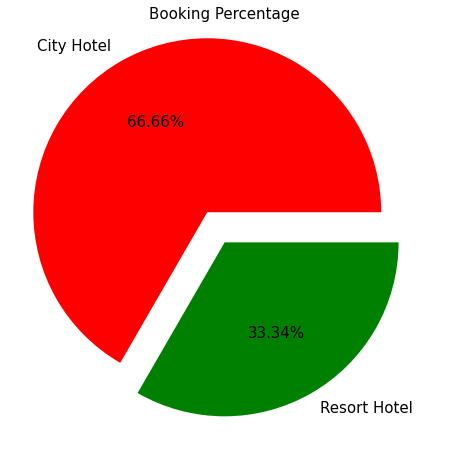

In [ ]:
bp1_1=hotel_booking_new['hotel'].value_counts()
bp1_1.plot.pie(fontsize=15,autopct='%1.2f%%',figsize=(10,8),colors=['r','g'],ylabel='',explode=[0.2,0],shadow=False,startangle = 0)
plt.title('Booking Percentage',fontsize=15)
print(' ')

**Q2** *YEARLY ARRIVALS AT HOTELS*

In [ ]:
hotel_booking_new['arrival_date_year'].value_counts()

2016    56357
2017    40541
2015    21834
Name: arrival_date_year, dtype: int64

**Q3** *YEARLY BOOKINGS*

Text(0.5, 1.0, 'Yearly Bookings')

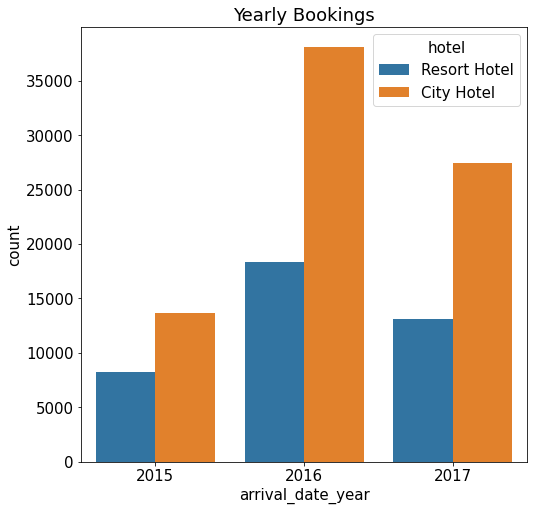

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
sns.countplot(x='arrival_date_year',data=hotel_booking_new,hue='hotel').set_title('Yearly Bookings')

**Q4** *BOOKINGS THAT WERE NOT CANCELLED*

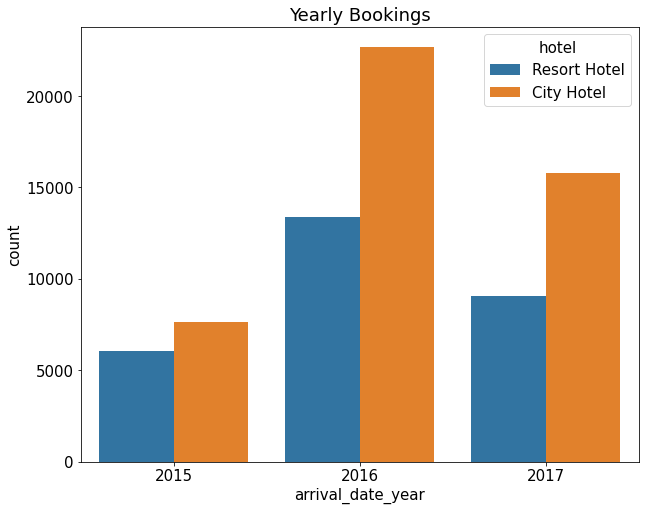

In [ ]:
canceled=hotel_booking_new[hotel_booking_new['is_canceled']==0]
plt.rcParams['figure.figsize']=(10,8)
sns.countplot(x='arrival_date_year',data=canceled,hue='hotel').set_title('Yearly Bookings')
print(' ')

**Q5** *BOOKINGS WHICH WERE CANCELLED*

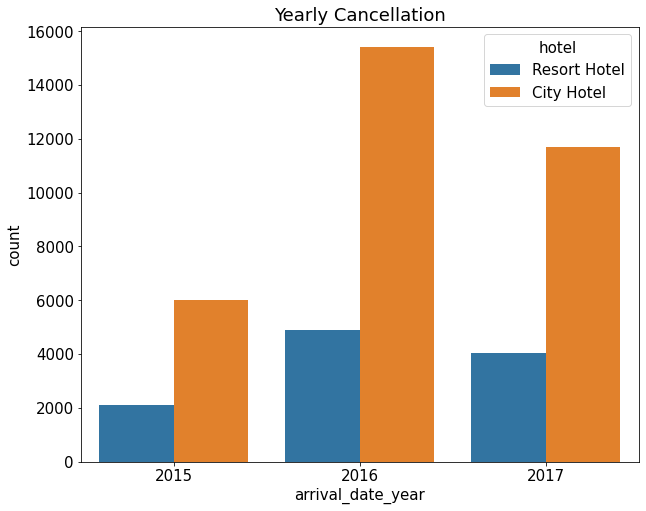

In [ ]:
not_canceled=hotel_booking_new[hotel_booking_new['is_canceled']!=0]
plt.rcParams['figure.figsize']=(10,8)
sns.countplot(x='arrival_date_year',data=not_canceled,hue='hotel').set_title('Yearly Cancellation')
print(" ")

In [ ]:
hotel_booking_new['is_canceled'].unique()

array([0, 1])

In [ ]:
hotel_booking_new['is_canceled'].replace({0:'No',1:'Yes'},inplace= True)

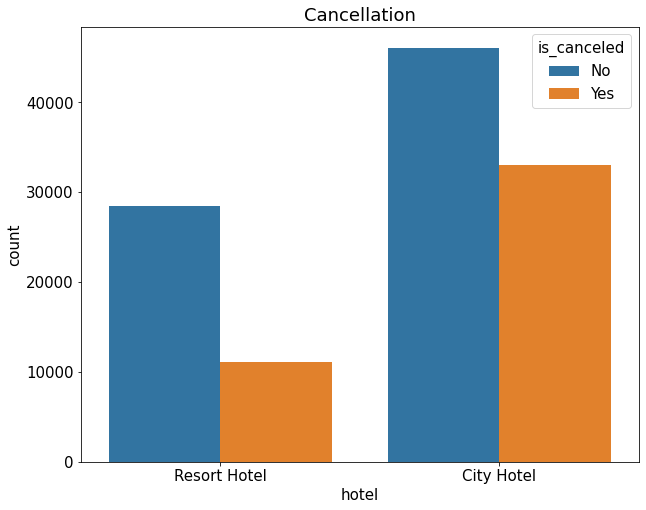

In [ ]:
sns.countplot(hue ="is_canceled",data= hotel_booking_new, x='hotel').set_title('Cancellation')
print(' ')

**Q6** *MONTHLY FOOTFALL IN DIFFERENT TYPES OF HOTELS*

In [ ]:
hotel_booking_new.groupby(['hotel'])['arrival_date_month'].value_counts()

hotel         arrival_date_month
City Hotel    August                8967
              May                   8221
              July                  8071
              June                  7885
              October               7580
              April                 7469
              September             7392
              March                 6434
              February              4950
              November              4334
              December              4114
              January               3730
Resort Hotel  August                4873
              July                  4540
              April                 3569
              May                   3547
              October               3502
              March                 3279
              September             3067
              February              3047
              June                  3032
              December              2596
              November              2397
              January   

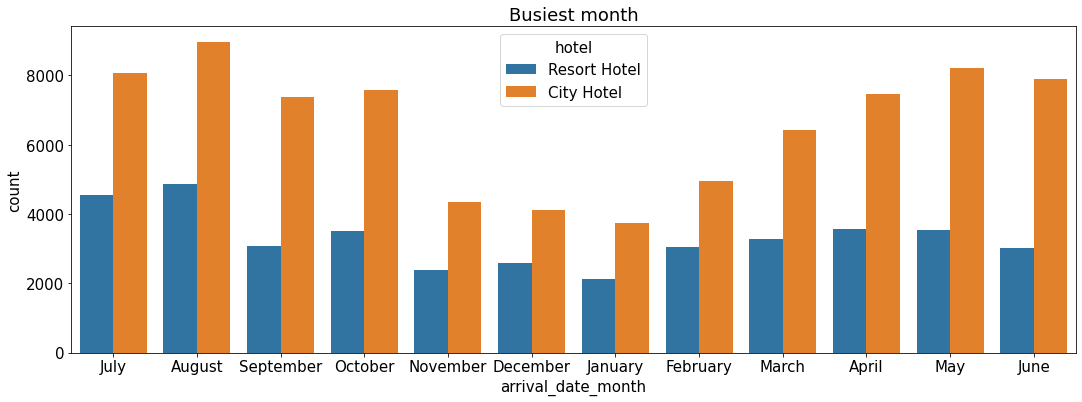

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='arrival_date_month', hue='hotel', data= hotel_booking_new).set_title('Busiest month')
print(' ')

**Q7** *NATIONALITY LIST*

In [ ]:
top10=hotel_booking_new['country'].value_counts().head(10).index.tolist()
top10

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

In [ ]:
top_10=hotel_booking_new[hotel_booking_new['country'].isin(top10)]

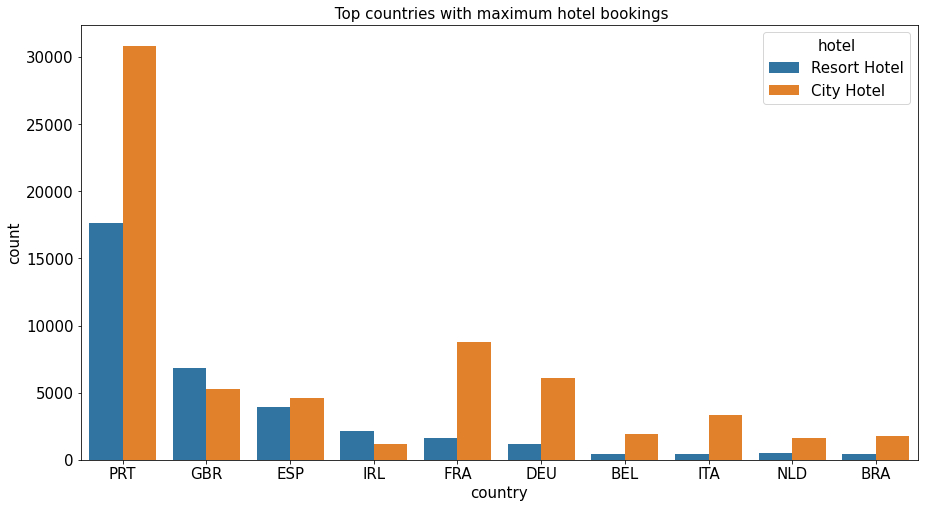

In [ ]:
plt.rcParams['figure.figsize']=(15,8)
plt.xlabel('country',fontsize=15)
plt.ylabel('counts',fontsize=15)
sns.countplot(x='country',hue='hotel',data=top_10).set_title(' Top countries with maximum hotel bookings',fontsize=15)
print(" ")

**Q8** *HOW LONG DO PEOPLE STAY AT THE HOTEL?*

In [ ]:
hotel_booking_new['stays_in_weekend_nights'].agg('max')

16

In [ ]:
hotel_booking_new['stays_in_week_nights'].agg('max')

40

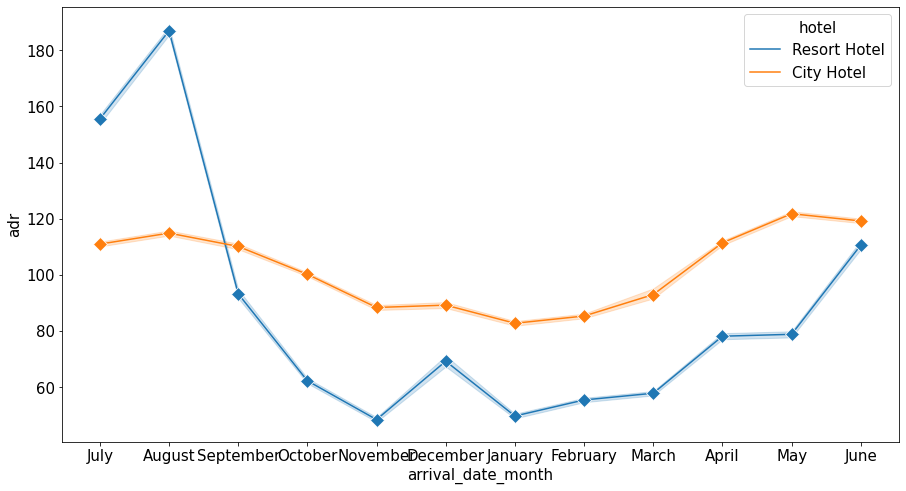

In [ ]:
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=hotel_booking_new,marker='D',markersize=10)
print(' ')

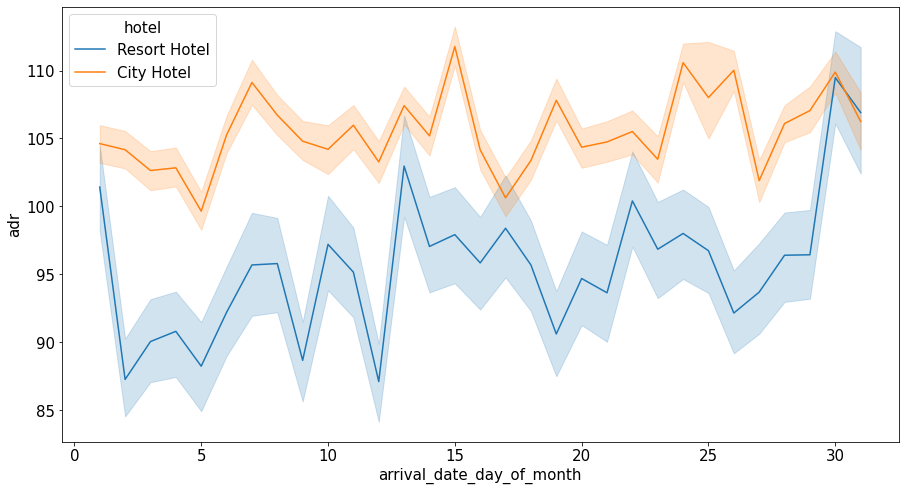

In [ ]:
sns.lineplot(x='arrival_date_day_of_month',y='adr',hue='hotel',data=hotel_booking_new)
print(' ')

**Q9** *MOST BOOKED ACCOMODATION TYPE*

In [ ]:
market_segment=hotel_booking_new['market_segment'].value_counts()
w=market_segment.index.tolist()

In [ ]:
v=hotel_booking_new['market_segment'].value_counts().tolist()
sum=0


TypeError: ignored

In [ ]:
tot=[]
for i in v:
  tot.append(str(round(i*100/sum,1))+"%")
tot

['47.4%', '20.3%', '16.7%', '10.5%', '4.3%', '0.6%', '0.2%', '0.0%']

In [ ]:
q=list(zip(w,tot))
q

[('Online TA', '47.4%'),
 ('Offline TA/TO', '20.3%'),
 ('Groups', '16.7%'),
 ('Direct', '10.5%'),
 ('Corporate', '4.3%'),
 ('Complementary', '0.6%'),
 ('Aviation', '0.2%'),
 ('Undefined', '0.0%')]

In [ ]:
l=[]
for i in q:
  n = str(i).replace(",","=")
  l.append(n)
l

["('Online TA'= '47.4%')",
 "('Offline TA/TO'= '20.3%')",
 "('Groups'= '16.7%')",
 "('Direct'= '10.5%')",
 "('Corporate'= '4.3%')",
 "('Complementary'= '0.6%')",
 "('Aviation'= '0.2%')",
 "('Undefined'= '0.0%')"]

In [ ]:
l=np.array(l)
l.shape

(8,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


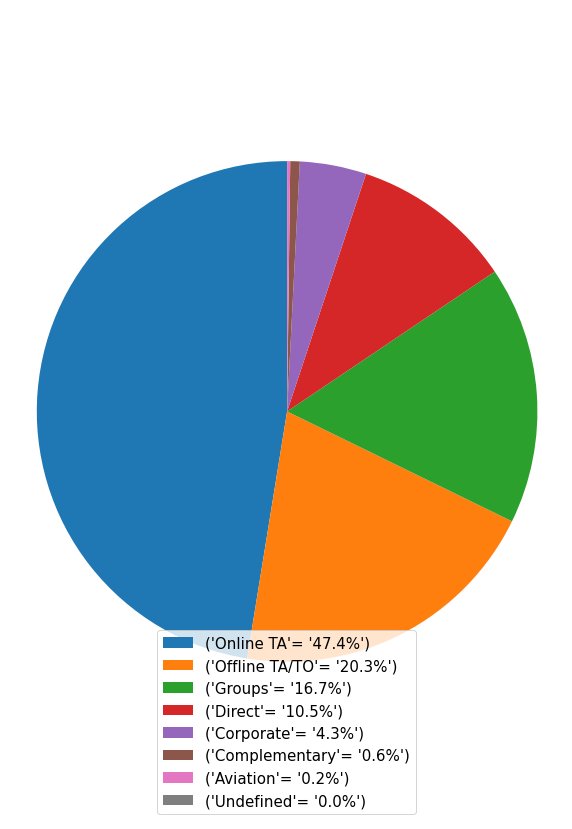

In [ ]:
plt.rcParams['figure.figsize']=(10,15)
plt.rcParams['font.size']=15
# x=market_segment.plot.pie(fontsize=12,title='Market Segment',ylabel='',explode=[0,0.2,0.2,0.2,0.2,0.2,0.2,0])
patches, texts = plt.pie(market_segment, startangle=90, radius=1.2)
plt.legend(patches,labels=l,loc='lower center')
plt.axis('equal')
print(' ')

**Q10** *WHAT IS THE RELATIONSHIP BETWEEN LEAD TIME AND CANCELLATION?*

In [ ]:
rel_lead_canc=hotel_booking_new.groupby(['lead_time','is_canceled','hotel']).size().unstack().head(20)
rel_lead_canc=pd.DataFrame(rel_lead_canc)